In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
%matplotlib inline

In [3]:
df=pd.read_csv('IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

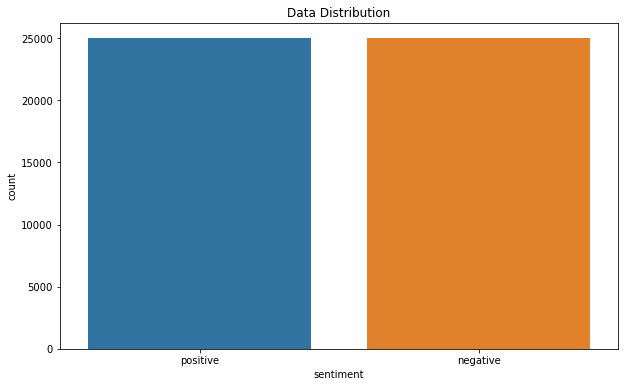

In [7]:
plt.figure(figsize = (10,6))
plt.title("Data Distribution")
sns.countplot(x = "sentiment", data = df)

plt.show()

In [10]:
df.iloc[4,0]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [11]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_lg")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [13]:
def clean_review(text):
    clean_text = re.sub('|', '', text)
    
    clean_text = re.sub('[^ a-zA-Z\'.]', ' ', clean_text)
    return clean_text

In [15]:
df['review'] = df['review'].apply(lambda x : clean_review(x))

In [16]:
df.iloc[4,0]

"Petter Mattei's  Love in the Time of Money  is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money  power and success do to people in the different situations we encounter.  br    br   This being a variation on the Arthur Schnitzler's play about the same theme  the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way  or another to the next person  but no one seems to know the previous point of contact. Stylishly  the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat. br    br   The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment  as one discerns is the case with 

In [17]:
doc = nlp(df.iloc[4,0])

In [18]:
# Removing stopwords and punctuations
cleaned_doc = [token for token in doc if not token.is_stop and not token.is_punct]
# SpaCy has a lot of lexical attributes available such as is_alpha, is_ascii, is_digit, is_upper, is_lower, is_space,
# like_url, like_num, like_email and so on.
for token in cleaned_doc:
    print("Text: ",token.text,"  Lemma: ",token.lemma_,"  POS Tagging:", token.pos_)

Text:  Petter   Lemma:  Petter   POS Tagging: PROPN
Text:  Mattei   Lemma:  Mattei   POS Tagging: PROPN
Text:      Lemma:      POS Tagging: SPACE
Text:  Love   Lemma:  Love   POS Tagging: PROPN
Text:  Time   Lemma:  Time   POS Tagging: PROPN
Text:  Money   Lemma:  Money   POS Tagging: PROPN
Text:      Lemma:      POS Tagging: SPACE
Text:  visually   Lemma:  visually   POS Tagging: ADV
Text:  stunning   Lemma:  stunning   POS Tagging: ADJ
Text:  film   Lemma:  film   POS Tagging: NOUN
Text:  watch   Lemma:  watch   POS Tagging: VERB
Text:  Mr.   Lemma:  Mr.   POS Tagging: PROPN
Text:  Mattei   Lemma:  Mattei   POS Tagging: PROPN
Text:  offers   Lemma:  offer   POS Tagging: VERB
Text:  vivid   Lemma:  vivid   POS Tagging: ADJ
Text:  portrait   Lemma:  portrait   POS Tagging: NOUN
Text:  human   Lemma:  human   POS Tagging: ADJ
Text:  relations   Lemma:  relation   POS Tagging: NOUN
Text:  movie   Lemma:  movie   POS Tagging: NOUN
Text:  telling   Lemma:  tell   POS Tagging: VERB
Text:  m

In [19]:
displacy.render(doc, style='dep', jupyter=True)

In [20]:
displacy.render(nlp(df.iloc[4,0]), style='ent', jupyter=True)

In [21]:
# Words embedding using SpaCy
for token in doc:
    print("Token: ",token.text, "  has vector ? ", token.has_vector, "  vector norm: ",token.vector_norm)

Token:  Petter   has vector ?  True   vector norm:  31.200056
Token:  Mattei   has vector ?  True   vector norm:  26.212975
Token:  's   has vector ?  True   vector norm:  85.970726
Token:      has vector ?  False   vector norm:  0.0
Token:  Love   has vector ?  True   vector norm:  58.742474
Token:  in   has vector ?  True   vector norm:  110.41568
Token:  the   has vector ?  True   vector norm:  72.329216
Token:  Time   has vector ?  True   vector norm:  58.469402
Token:  of   has vector ?  True   vector norm:  120.9016
Token:  Money   has vector ?  True   vector norm:  43.099228
Token:      has vector ?  False   vector norm:  0.0
Token:  is   has vector ?  True   vector norm:  110.41255
Token:  a   has vector ?  True   vector norm:  112.98545
Token:  visually   has vector ?  True   vector norm:  45.528835
Token:  stunning   has vector ?  True   vector norm:  36.39297
Token:  film   has vector ?  True   vector norm:  79.81601
Token:  to   has vector ?  True   vector norm:  125.107445

In [23]:
# We will use a small subset of data
subset = df[:20000]

In [24]:
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in subset.review])
    
doc_vectors.shape

(20000, 300)

In [25]:
subset['sentiment'] = subset['sentiment'].apply(lambda x : 1 if x == 'positive' else 0)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(doc_vectors, subset.sentiment, test_size=0.1, random_state=1)

In [27]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
print(f"Accuracy: {svc.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 84.250%


In [28]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
print(f"Accuracy: {lgr.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 84.150%
